In [5]:
import os
import numpy as np
import pandas as pd
import scipy.signal as signal

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import calendar

from plotting import *

In [6]:
#shallow indices
#these are the subset filtered pc1 and pc2 values
pc1_filt_file = './data/pc1_filt_all_months.npy'
pc2_filt_file = './data/pc2_filt_all_months.npy'

shallow_idx_file = './data/pc1_filt_025.npy'
shallow_idx2_file = './data/pc2_filt_012.npy'

#time array
time_file = './data/time.npy'

#load in data
pc1_filt = np.load(pc1_filt_file)
pc2_filt = np.load(pc2_filt_file)

shallow_idx = np.load(shallow_idx_file)
shallow_idx2 = np.load(shallow_idx2_file)

#convert time array to datetime values so that we can extract month
time = np.load(time_file)
time = pd.to_datetime(time)

We have filtered our Principal Component time series, and now we are interested in learning about the seasonal dependence of the upward pressure velocity in the Eastern Pacific. To do so, we can set a threshold value for upward $\omega$, and then subset those dates. With those dates in hand, we can analyze which months get "hit" most often. That is, during which months is the upward pressure velocity in the Eastern Pacific higher than X standard deviation(s) away from the mean?

Recall, these are what the filtered PC1 and PC2 look like:

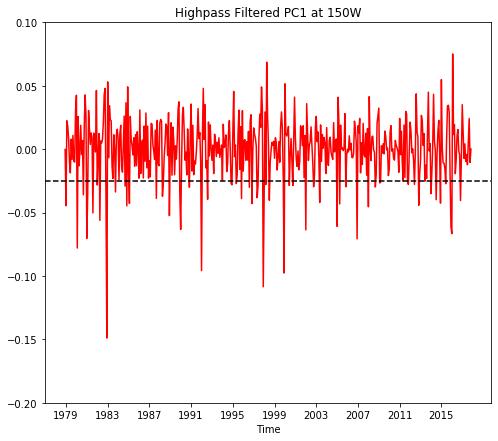

In [7]:
#plot filtered pc1
plot_pcs(pc1_filt, time.month, time.year, 'Highpass Filtered PC1 at 150W', [-0.2, 0.1], True, -0.025)

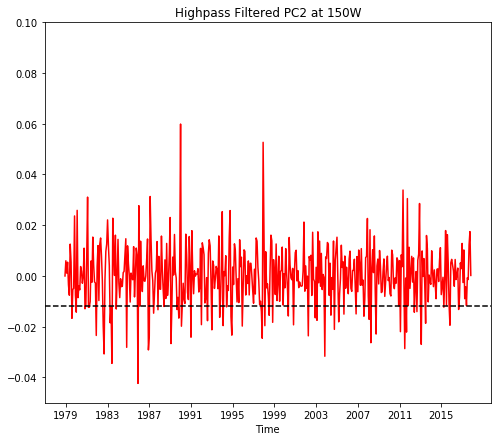

In [8]:
#plot filtered pc2
plot_pcs(pc2_filt, time.month, time.year, 'Highpass Filtered PC2 at 150W', [-0.05, 0.1], True, -0.012)

In [9]:
#subset time for shallow indices
time1 = time[shallow_idx]
time2 = time[shallow_idx2]

#convert months to calendar names
time1_names = [calendar.month_name[month] for month in time1.month]
time2_names = [calendar.month_name[month] for month in time2.month]

In [10]:
#create dataframe to hold monthly value counts
#need to pass in an index as a placeholder for our time1, time2 arrays
df = pd.DataFrame({'January':0, 'February':0, 'March':0, 'April':0,
                  'May':0, 'June':0, 'July':0, 'August':0,
                  'September':0, 'October':0, 'November':0, 'December':0}, index=range(1, 3))

In [11]:
#inspect dataframe here
df.head()

,January,February,March,April,May,June,July,August,September,October,November,December
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
#now add these values to our dataframe for both time1_names and time2_names
for value in time1_names:
    df.loc[1][value] += 1
    
for value in time2_names:
    df.loc[2][value] += 1

In [13]:
df.head()

,January,February,March,April,May,June,July,August,September,October,November,December
1,9,13,3,1,3,5,5,2,3,4,4,10
2,6,5,8,2,5,2,6,3,4,6,4,12


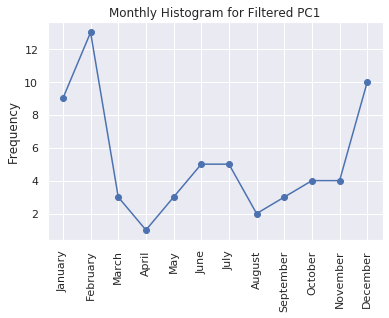

In [14]:
#now plot the results
#set seaborn style
sns.set(style='darkgrid')

fig, ax = plt.subplots()

ax.plot(df.columns, df.loc[1], marker='o')
ax.set_xticklabels(df.columns, rotation=90)

ax.set_ylabel('Frequency')
ax.set_title('Monthly Histogram for Filtered PC1')

plt.show()

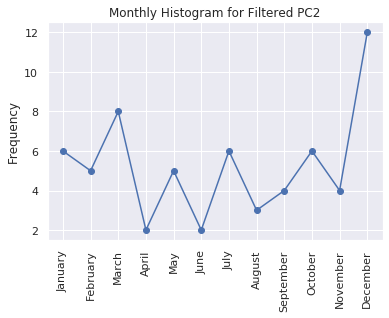

In [15]:
#plot monthly frequency chart for PC2
fig, ax = plt.subplots()

ax.plot(df.columns, df.loc[2], marker='o')
ax.set_xticklabels(df.columns, rotation=90)

ax.set_ylabel('Frequency')
ax.set_title('Monthly Histogram for Filtered PC2')

plt.show()

We can see that for both PC1 and PC2, DJF contains the most frequent type of event that we care about while MAM contains the least. Thus, for our compositing analysis, we will mainly focus on these seasons while testing for significance at various pressure levels to see how the spatial structures differ between the two times.